In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
from google.colab import drive


In [91]:
mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [92]:
#drive.mount('/content/drive/MyDrive/')

In [93]:
data_path = r'/content/working on_Daneshga Zanjan_2019_2023csv.csv'
df = pd.read_csv(data_path)


In [94]:
df.head()

,date,Mean_CH4,ffm,tm,um
0,5/12/2019 0:00,1854.480592,2.4,15.9,44.4
1,5/13/2019 0:00,1854.405999,3.0,16.1,40.4
2,5/14/2019 0:00,1854.331406,2.2,17.3,36.4
3,5/15/2019 0:00,1854.256813,3.0,16.0,39.6
4,5/16/2019 0:00,1854.182220,2.6,16.7,38.2


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      1409 non-null   object 
 1   Mean_CH4  1409 non-null   float64
 2   ffm       1409 non-null   float64
 3   tm        1409 non-null   float64
 4   um        1409 non-null   float64
dtypes: float64(4), object(1)
memory usage: 55.2+ KB


In [96]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')


array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

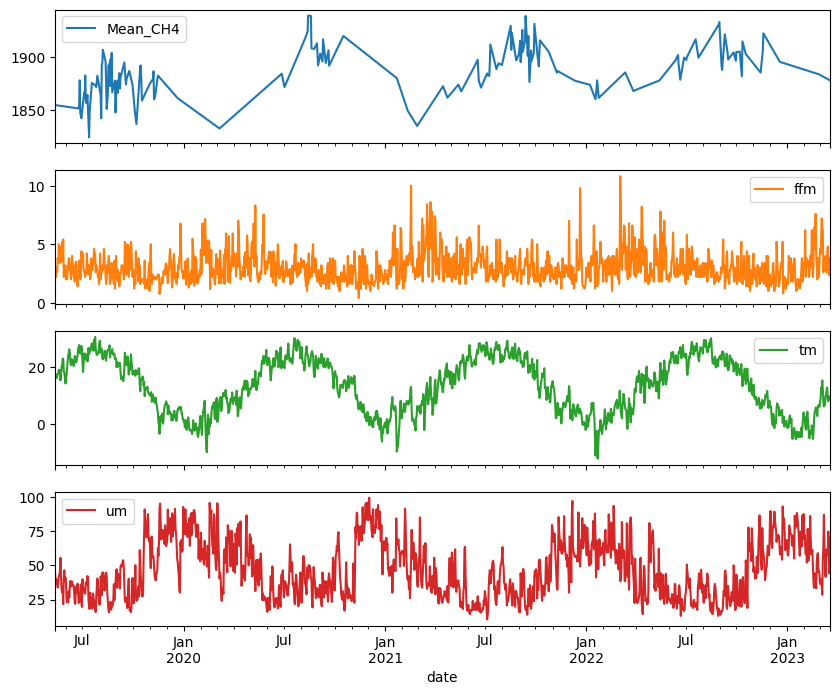

In [97]:
df.set_index('date')[['Mean_CH4', 'ffm', 'tm', 'um']].plot(subplots=True)

In [98]:
df_input=df[['Mean_CH4', 'ffm', 'tm', 'um']]

In [99]:
df_input

,Mean_CH4,ffm,tm,um
0,1854.480592,2.4,15.9,44.4
1,1854.405999,3.0,16.1,40.4
2,1854.331406,2.2,17.3,36.4
3,1854.256813,3.0,16.0,39.6
4,1854.182220,2.6,16.7,38.2
...,...,...,...,...
1404,1879.268615,4.8,8.8,60.0
1405,1878.977940,2.8,7.9,74.8
1406,1878.687265,2.4,8.6,54.6
1407,1878.396590,3.8,9.6,44.2


In [100]:
df_input.describe()

,Mean_CH4,ffm,tm,um
count,1409.000000,1409.000000,1409.000000,1409.000000
mean,1881.661527,3.041204,13.201278,46.639602
std,22.681168,1.281029,9.408765,20.493844
min,1823.614867,0.400000,-12.100000,10.400000
25%,1866.914809,2.200000,5.300000,29.400000
50%,1881.640598,2.800000,13.900000,43.000000
75%,1898.819363,3.615380,21.700000,62.400000
max,1940.039936,10.800000,30.300000,99.600000


In [101]:
#df_input.query("Mean_CH4 > 1800")

In [102]:
#df_input = df_input.select_dtypes(include=['float64', 'int64'])

In [103]:
scaler = MinMaxScaler()
date_scaled = scaler.fit_transform(df_input)

In [104]:
date_scaled

array([[0.26511236, 0.19230769, 0.66037736, 0.38116592],
       [0.26447167, 0.25      , 0.66509434, 0.33632287],
       [0.26383097, 0.17307692, 0.69339623, 0.29147982],
       ...,
       [0.47302869, 0.19230769, 0.48820755, 0.4955157 ],
       [0.47053202, 0.32692308, 0.51179245, 0.37892377],
       [0.46803535, 0.19230769, 0.51179245, 0.66367713]])

In [105]:
features=date_scaled
target=date_scaled[:,0]

In [106]:
TimeseriesGenerator(features, target, length=2, sampling_rate=1, batch_size=1)[0]

(array([[[0.26511236, 0.19230769, 0.66037736, 0.38116592],
         [0.26447167, 0.25      , 0.66509434, 0.33632287]]]),
 array([0.26383097]))

In [107]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=123, shuffle = False)

In [108]:
x_train.shape

(1127, 4)

In [109]:
x_test.shape

(282, 4)

In [110]:
win_length=20
batch_size=32
num_features=4
train_generator = TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

In [111]:
train_generator[0]

(array([[[0.26511236, 0.19230769, 0.66037736, 0.38116592],
         [0.26447167, 0.25      , 0.66509434, 0.33632287],
         [0.26383097, 0.17307692, 0.69339623, 0.29147982],
         ...,
         [0.25422054, 0.21153846, 0.70754717, 0.40358744],
         [0.25357985, 0.23076923, 0.66981132, 0.3161435 ],
         [0.25293915, 0.26923077, 0.61792453, 0.34529148]],
 
        [[0.26447167, 0.25      , 0.66509434, 0.33632287],
         [0.26383097, 0.17307692, 0.69339623, 0.29147982],
         [0.26319028, 0.25      , 0.66273585, 0.32735426],
         ...,
         [0.25357985, 0.23076923, 0.66981132, 0.3161435 ],
         [0.25293915, 0.26923077, 0.61792453, 0.34529148],
         [0.25229845, 0.15384615, 0.65801887, 0.29820628]],
 
        [[0.26383097, 0.17307692, 0.69339623, 0.29147982],
         [0.26319028, 0.25      , 0.66273585, 0.32735426],
         [0.26254958, 0.21153846, 0.67924528, 0.31165919],
         ...,
         [0.25293915, 0.26923077, 0.61792453, 0.34529148],
        

In [112]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape= (win_length, num_features), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(64, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [113]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 20, 128)             │          68,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 20, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 20, 128)             │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 20, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 20, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 249,153 (973.25 KB)

 Trainable params: 249,153 (973.25 KB)

 Non-trainable params: 0 (0.00 B)

In [114]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=2,
                                                  mode='min')
model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator,
    shuffle=False,
                        callbacks=[early_stopping]
    )


Epoch 1/20
 2/35 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0657 - mean_absolute_error: 0.2489

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - loss: 0.0703 - mean_absolute_error: 0.2250 - val_loss: 0.0403 - val_mean_absolute_error: 0.1880
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - loss: 0.0206 - mean_absolute_error: 0.1170 - val_loss: 0.0174 - val_mean_absolute_error: 0.1165
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - loss: 0.0129 - mean_absolute_error: 0.0881 - val_loss: 0.0062 - val_mean_absolute_error: 0.0580
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 0.0116 - mean_absolute_error: 0.0815 - val_loss: 0.0063 - val_mean_absolute_error: 0.0563
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0175 - mean_absolute_error: 0.1009 - val_loss: 0.0055 - val_mean_absolute_error: 0.0545
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - loss: 0.0165 - mean_absolute_error: 0.0981 - val_loss: 0.0081 - val_mean_absolute_error: 0.0710
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 0.0116 - mean_absolute_error: 0.0840 - val_loss: 0.0054 -

In [115]:
model.evaluate(test_generator, verbose=0)

[0.0051744915544986725, 0.04923952370882034]

In [116]:
predictions = model.predict(test_generator, verbose=0)

In [117]:
predictions.shape[0]

262

In [118]:
predictions

array([[0.6446204 ],
       [0.65121984],
       [0.6571192 ],
       [0.6619551 ],
       [0.66679215],
       [0.6708386 ],
       [0.6747894 ],
       [0.6799888 ],
       [0.68587446],
       [0.69242525],
       [0.7004182 ],
       [0.7085011 ],
       [0.71519166],
       [0.72177446],
       [0.7284727 ],
       [0.7363228 ],
       [0.74323034],
       [0.7506898 ],
       [0.7584489 ],
       [0.76569724],
       [0.77196   ],
       [0.77667034],
       [0.7801535 ],
       [0.779775  ],
       [0.7766566 ],
       [0.7727424 ],
       [0.7689471 ],
       [0.76405364],
       [0.7598696 ],
       [0.7563543 ],
       [0.754431  ],
       [0.75343406],
       [0.7527184 ],
       [0.7527398 ],
       [0.75385725],
       [0.75607336],
       [0.7592123 ],
       [0.76292855],
       [0.76716155],
       [0.7716818 ],
       [0.77751696],
       [0.7831192 ],
       [0.7876044 ],
       [0.79129636],
       [0.79492635],
       [0.7987331 ],
       [0.8036028 ],
       [0.808

In [119]:
y_test

array([0.63086906, 0.63998298, 0.64909691, 0.65821084, 0.66732476,
       0.67643868, 0.60005843, 0.56440892, 0.51903147, 0.47365402,
       0.49961497, 0.52557592, 0.55153687, 0.57749782, 0.60345877,
       0.62941973, 0.65538067, 0.65042445, 0.64546825, 0.64051203,
       0.63555581, 0.65842338, 0.66762511, 0.67682683, 0.68602856,
       0.69523029, 0.70443201, 0.71363374, 0.72283547, 0.7320372 ,
       0.74123892, 0.75044065, 0.75964238, 0.7688441 , 0.77804583,
       0.78724756, 0.79644928, 0.80565101, 0.77541029, 0.74516959,
       0.71492888, 0.68468817, 0.65444746, 0.66181838, 0.66918928,
       0.67656019, 0.6839311 , 0.69130201, 0.69867292, 0.70604382,
       0.71341474, 0.72078565, 0.72815655, 0.73552747, 0.74289837,
       0.75026928, 0.7576402 , 0.7650111 , 0.77238201, 0.77975292,
       0.78712383, 0.79449474, 0.80186564, 0.80923656, 0.81660747,
       0.82397837, 0.83134929, 0.8387202 , 0.8460911 , 0.85346202,
       0.86083292, 0.86820383, 0.87557474, 0.88294565, 0.89031

In [120]:
x_test

array([[0.63086906, 0.17307692, 0.80660377, 0.28699552],
       [0.63998298, 0.25      , 0.85141509, 0.13901345],
       [0.64909691, 0.26923077, 0.7995283 , 0.17488789],
       ...,
       [0.47302869, 0.19230769, 0.48820755, 0.4955157 ],
       [0.47053202, 0.32692308, 0.51179245, 0.37892377],
       [0.46803535, 0.19230769, 0.51179245, 0.66367713]])

In [121]:
x_test[:,1][win_length:]

array([0.23076923, 0.51923077, 0.28846154, 0.15384615, 0.23076923,
       0.40384615, 0.23076923, 0.25      , 0.19230769, 0.32692308,
       0.42307692, 0.38461538, 0.28846154, 0.23076923, 0.25      ,
       0.30769231, 0.26923077, 0.28846154, 0.17307692, 0.28846154,
       0.32692308, 0.25      , 0.17307692, 0.17307692, 0.17307692,
       0.23076923, 0.26923077, 0.17307692, 0.17307692, 0.19230769,
       0.28846154, 0.28846154, 0.17307692, 0.19230769, 0.25      ,
       0.28846154, 0.19230769, 0.23076923, 0.13461538, 0.15384615,
       0.40384615, 0.38461538, 0.30769231, 0.25      , 0.26923077,
       0.17307692, 0.30769231, 0.21153846, 0.17307692, 0.26923077,
       0.19230769, 0.11538462, 0.19230769, 0.13461538, 0.15384615,
       0.21153846, 0.21153846, 0.19230769, 0.15384615, 0.13461538,
       0.17307692, 0.15384615, 0.17307692, 0.25      , 0.21153846,
       0.21153846, 0.30769231, 0.48076923, 0.26923077, 0.26923077,
       0.07692308, 0.11538462, 0.17307692, 0.34615385, 0.38461

In [122]:
df_pred=pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][win_length:])],axis=1)

In [123]:
df_pred

,0,0,1,2
0,0.644620,0.230769,0.853774,0.278027
1,0.651220,0.519231,0.733491,0.450673
2,0.657119,0.288462,0.688679,0.385650
3,0.661955,0.153846,0.742925,0.343049
4,0.666792,0.230769,0.759434,0.309417
...,...,...,...,...
257,0.476274,0.423077,0.492925,0.556054
258,0.475995,0.230769,0.471698,0.721973
259,0.475166,0.192308,0.488208,0.495516
260,0.475220,0.326923,0.511792,0.378924


In [124]:
rev_trans=scaler.inverse_transform(df_pred)

In [125]:
rev_trans

array([[1898.66484371,    2.8       ,   24.1       ,   35.2       ],
       [1899.43318237,    5.8       ,   19.        ,   50.6       ],
       [1900.12001689,    3.4       ,   17.1       ,   44.8       ],
       ...,
       [1878.93606929,    2.4       ,    8.6       ,   54.6       ],
       [1878.94241891,    3.8       ,    9.6       ,   44.2       ],
       [1878.86428736,    2.4       ,    9.6       ,   69.6       ]])

In [126]:
df_final=df_input[predictions.shape[0]*-1:]

In [127]:
df_final.count()

,0
Mean_CH4,262
ffm,262
tm,262
um,262


In [128]:
#df_final['App_Pred']=rev_trans[:,0]

In [129]:
df_final.loc[:, 'App_Pred'] = rev_trans[:, 0]


<ipython-input-129-ce3c9bac07c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.loc[:, 'App_Pred'] = rev_trans[:, 0]


In [130]:
df_final

,Mean_CH4,ffm,tm,um,App_Pred
1147,1897.609496,2.8,24.1,35.2,1898.664844
1148,1900.271854,5.8,19.0,50.6,1899.433182
1149,1901.343166,3.4,17.1,44.8,1900.120017
1150,1902.414477,2.0,19.4,41.0,1900.683037
1151,1903.485789,2.8,20.1,38.0,1901.246190
...,...,...,...,...,...
1404,1879.268615,4.8,8.8,60.0,1879.065053
1405,1878.977940,2.8,7.9,74.8,1879.032584
1406,1878.687265,2.4,8.6,54.6,1878.936069
1407,1878.396590,3.8,9.6,44.2,1878.942419


<Axes: >

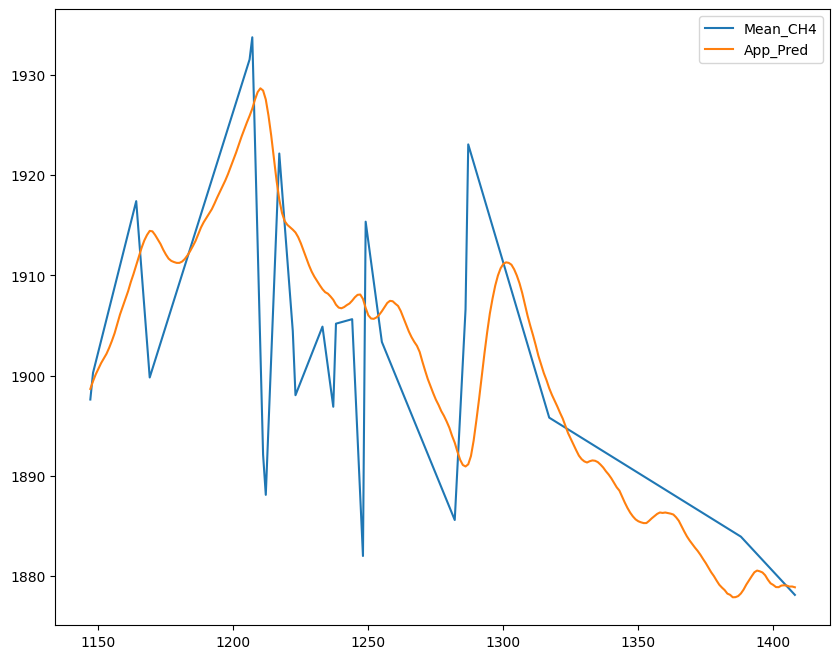

In [131]:
df_final[['Mean_CH4','App_Pred']].plot()

#futuer